##### Scikit-learn'de 3 tane Naive Bayes sınıflandırma yöntemi vardır: Bunlar Gaussian, Bernoulli ve Multinominal'dır.

##### Gaussian, sürekli veriler için kullanılır.

##### Bernoulli, iki kategorili veriler için kullanılır.

##### Multinominal ise ikiden fazla kategoriler için kullanılır.

### Gaussian Naive Bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(100,2,centers=2,cluster_std=1.5)

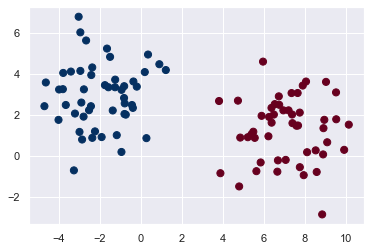

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
model = GaussianNB()

In [8]:
model.fit(X,y)

GaussianNB()

In [9]:
rng = np.random.RandomState(0)
X_yeni = [-6,-14] + [14,18] * rng.rand(1000,2)

In [10]:
y_yeni = model.predict(X_yeni)

(-5.445523152971347,
 10.90164599079151,
 -3.3551936224599856,
 7.2721674471719435)

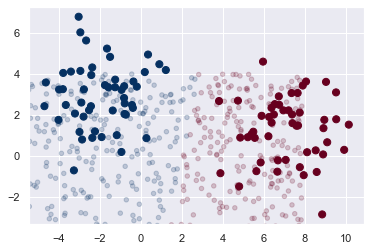

In [11]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_yeni[:,0], X_yeni[:,1], c=y_yeni, s=20, cmap='RdBu', alpha=0.2)
plt.axis(lim)

##### Koyu renkli veriler gerçek veriler, soluk renkli veriler ise tahmin verilerini gösteriyor. Bu grafiğe göre modelin iyi bir sınıflandırma yaptığını söyleyebiliriz.

### Multinominal Naive Bayes

In [12]:
from sklearn.datasets import fetch_20newsgroups

In [13]:
data = fetch_20newsgroups

#Bu veri seti 20 farklı konuda haber yazıları içeriyor.

In [14]:
kategoriler = ['talk.religion.misc',
               'soc.religion.christian',
              'sci.space',
              'comp.graphics']

In [15]:
train = fetch_20newsgroups(subset='train', categories=kategoriler)
test = fetch_20newsgroups(subset='test', categories=kategoriler)

In [16]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



##### Makine öğrenmesinde bu veri setini kullanmak için her bir stringin içeriğini bir sayısal vektöre çevirmemiz gerekiyor. Bunun için "TfidfVectorizer" sınıfı kullanılır.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [19]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [20]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [21]:
etiketler = model.predict(test.data)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
mat = confusion_matrix(test.target, etiketler)

Text(89.133125, 0.5, 'Tahmin Etiketleri')

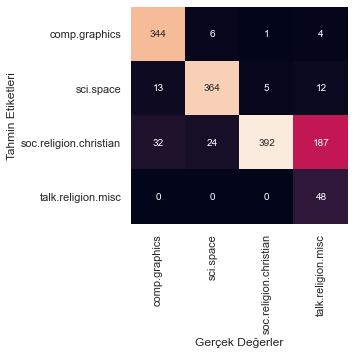

In [24]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Etiketleri')

##### Herhangi bir stringin kategorilerini belirlemek için bir tool'a sahibiz. Şimdi predict metodunu kullanarak bir stringin içeriğini tahmin etmek için fonksiyon oluşturalım:

In [25]:
def predict_category(s, train=train, model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [26]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [27]:
#Görüldüğü üzere bu yazının hristiyanlık ile ilgili olduğu tahmin edildi.

In [28]:
predict_category('determining the screen resolution')

'comp.graphics'

In [ ]:
model.